# First steps with Frequency MOCs 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mocpy import FrequencyMOC

We use a fits built from a file from the Cassini/RPWS/HFR database. This radio instrument has a configurable spectral sampling. 

The original observation file (and many others) is available for download here: https://lesia.obspm.fr/kronos/data/2012_091_180/n2/

In [2]:
fmoc = FrequencyMOC.from_fits("../resources/FMOC/P2012180.fits")

We can plot it in frequency or wavelength

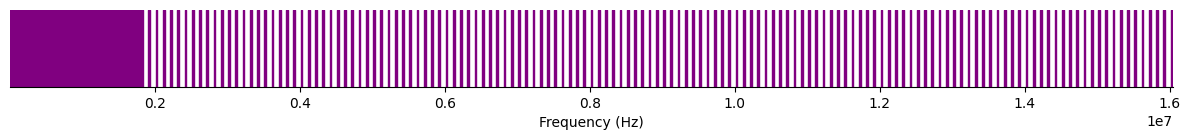

In [3]:
fig, ax = plt.subplots(figsize=(15, 1))
fmoc.plot_frequencies(ax, color="purple")
# this method plots the frequency ranges in log scale by default
# but we can change it to linear if needed
ax.set(xscale="linear")
# and any customization on the ax of fig objects will work too
ax.spines[["left", "top", "right"]].set_visible(False)

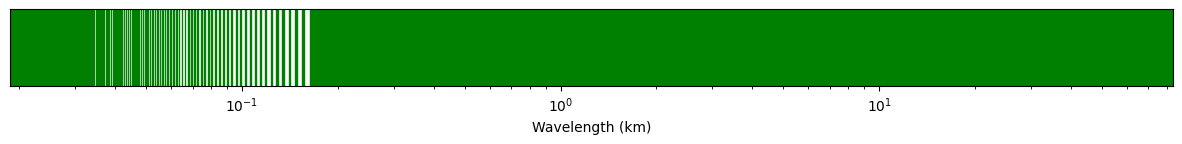

In [4]:
fig, ax = plt.subplots(figsize=(15, 1))
fmoc.plot_wavelengths(ax, color="g", length_unit="km")

We create a dictionnary of FMOCs with less and less precise order ranging from 50 to 10.

In [5]:
print(
    f"we first create an initial FMOC at order {fmoc.max_order}"
    " and then generate the dictionnary",
)
fmocs = {n: fmoc.degrade_to_order(n) for n in np.linspace(50, 10, 5, dtype=int)}

we first create an initial FMOC at order 50 and then generate the dictionnary


In [6]:
for order in fmocs:
    print(
        f"At order {order}, this F-MOC has {len(fmocs[order].to_hz_ranges())} "
        "non overlapping spectral intervals",
    )

At order 50, this F-MOC has 143 non overlapping spectral intervals
At order 40, this F-MOC has 143 non overlapping spectral intervals
At order 30, this F-MOC has 143 non overlapping spectral intervals
At order 20, this F-MOC has 143 non overlapping spectral intervals
At order 10, this F-MOC has 1 non overlapping spectral intervals


In [7]:
for order in fmocs:
    print(
        f"At order {order}, the spectrum covers {round(fmocs[order].to_hz_ranges()[0][0])} Hz"
        " to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz",
    )

At order 50, the spectrum covers 3593 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz
At order 40, the spectrum covers 3593 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz
At order 30, the spectrum covers 3593 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz
At order 20, the spectrum covers 3593 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz
At order 10, the spectrum covers 3584 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz


Next step is FT-MOC, in order to manage the time series of sweep. 

**NB:** Cassini/RPWS observed continously from january 2000 to september 2017 :-) 